# Fraud Detection System
This notebook implements a fraud detection system using the Credit Card Fraud dataset. It includes data preprocessing, model training, evaluation, and a simple user interface for testing.


## Data Preprocessing
1. Load the dataset.
2. Handle class imbalance using **SMOTE (Synthetic Minority Over-sampling Technique)**.
3. Scale the features using **StandardScaler** for better model performance.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


## Model Training
We train two models:
- **Random Forest Classifier**
- **Gradient Boosting Classifier**
The dataset is split into training and testing sets, and evaluation metrics (Precision, Recall, F1-score) are calculated.


In [ ]:
df=pd.read_csv('creditcard.csv')

## Model Evaluation
We use classification metrics to assess the model:
- **Accuracy**
- **Precision**
- **Recall**
- **F1-score**


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## Testing Interface
A simple command-line interface is implemented, allowing users to input transaction details and get a fraud prediction.


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7968,10980,1.284388,-0.013181,0.646174,0.198985,-0.568675,-0.526121,-0.448235,-0.167709,1.773223,...,-0.101868,-0.030298,-0.081412,-0.123281,0.278808,1.064001,-0.090181,0.000481,15.95,0.0
7969,10981,1.190428,-0.122329,0.954945,0.267101,-0.971026,-0.652279,-0.612992,-0.003909,1.633117,...,-0.015001,0.127027,0.012079,0.534409,0.112179,1.004483,-0.100188,-0.004774,14.95,0.0
7970,10981,-0.725175,0.298202,1.824761,-2.587170,0.283605,-0.016617,0.153659,0.045084,-0.197611,...,-0.017097,-0.070535,-0.442861,-0.895837,0.624743,-0.510601,-0.031142,0.025564,12.95,0.0
7971,10981,1.226153,-0.129645,0.735197,0.142752,-0.703245,-0.349641,-0.612641,0.020507,1.648986,...,-0.047936,0.040196,-0.057391,-0.012386,0.187685,1.037786,-0.100081,-0.009869,15.95,0.0
7972,10981,1.145381,-0.059349,0.968088,0.267891,-0.822582,-0.597727,-0.450197,-0.119747,1.338188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,...,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000
mean,4257.151261,-0.299740,0.295226,0.899355,0.215736,-0.025285,0.157286,-0.026445,-0.070525,0.655244,...,-0.053715,-0.165799,-0.035174,0.025977,0.088893,0.020256,0.016150,0.001161,65.413540,0.003136
std,3198.964299,1.498341,1.283914,1.090297,1.447057,1.167218,1.325015,1.063709,1.332568,1.156618,...,0.953498,0.654858,0.488322,0.601760,0.427505,0.517409,0.403570,0.275976,194.911169,0.055915
min,0.000000,-23.066842,-25.640527,-12.389545,-4.657545,-32.092129,-7.574798,-12.968670,-23.632502,-3.878658,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.054085,0.000000,0.000000
25%,1531.000000,-1.046362,-0.237359,0.372435,-0.687521,-0.630525,-0.655399,-0.517733,-0.199794,-0.085635,...,-0.271837,-0.581473,-0.182989,-0.340419,-0.161009,-0.363180,-0.063198,-0.019081,4.617500,0.000000
50%,3635.000000,-0.416341,0.335446,0.948695,0.223379,-0.107337,-0.148669,0.004732,0.016128,0.613170,...,-0.130344,-0.167048,-0.046107,0.089606,0.115418,-0.015260,0.007101,0.018443,15.950000,0.000000
75%,6662.000000,1.122758,0.950582,1.597949,1.131542,0.405082,0.555200,0.527353,0.307111,1.294087,...,0.044823,0.250886,0.086806,0.421015,0.361249,0.329322,0.144700,0.080563,54.910000,0.000000
max,10981.000000,1.685314,8.261750,4.101716,7.380245,11.974269,21.393069,34.303177,3.877662,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,4.173387,4.860769,7712.430000,1.000000


In [ ]:
df.isnull().sum().max()

1

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.size

247163

In [ ]:
df.shape

(7973, 31)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

In [ ]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.67 % of the dataset
Frauds 0.31 % of the dataset


<ipython-input-12-b8bd70761a26>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


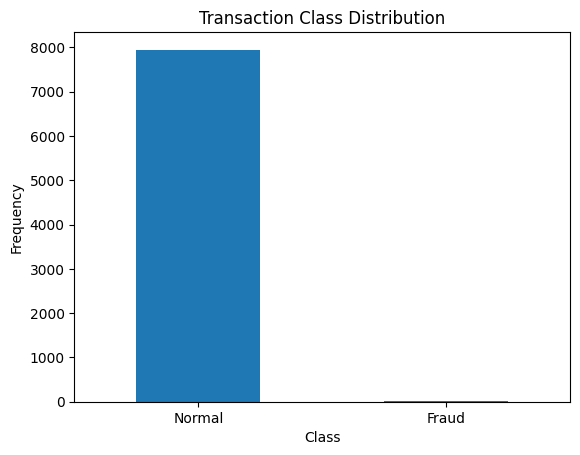

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


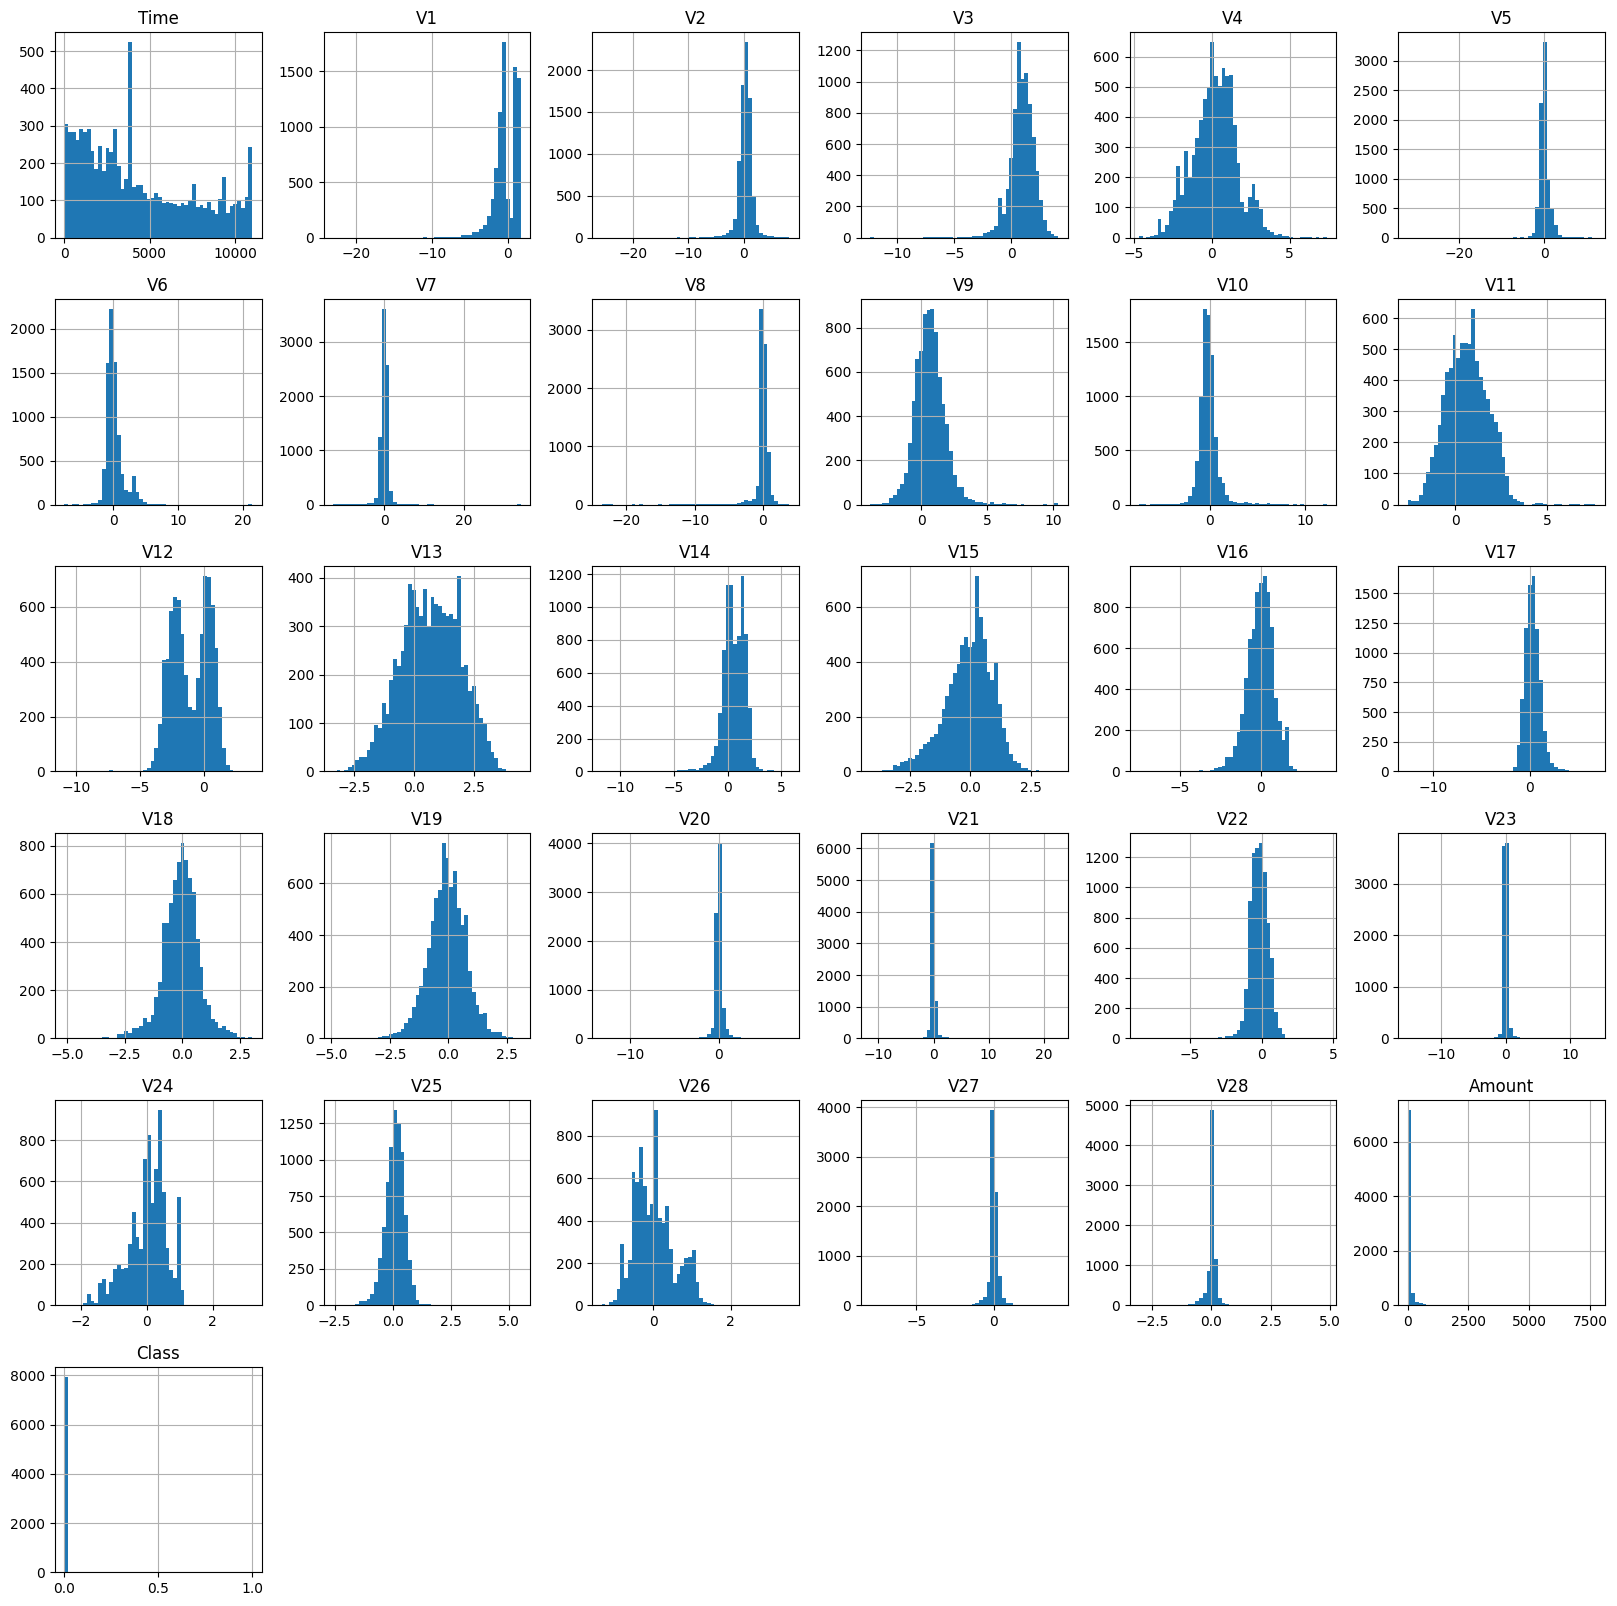

In [ ]:
df.hist(bins=50,figsize=(20,20))
plt.show()

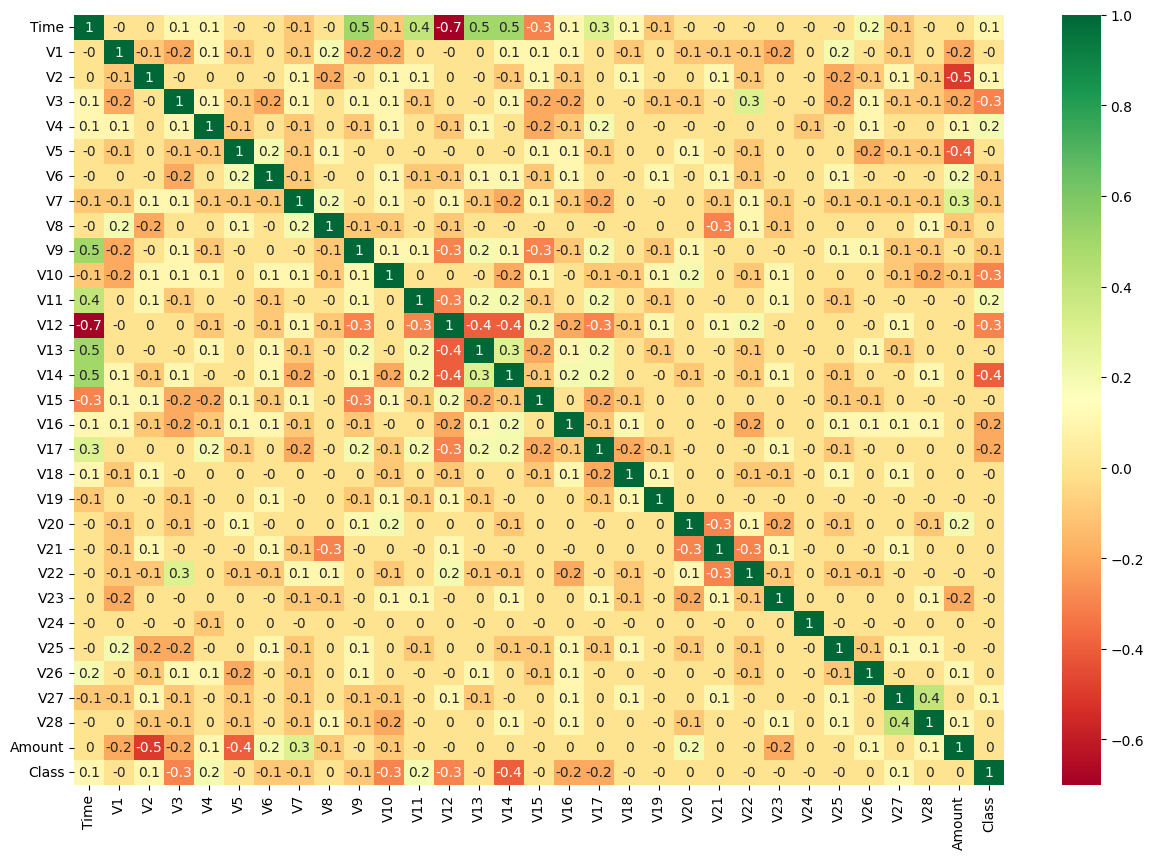

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(round(df.corr(method ='pearson'),1),annot=True,cmap='RdYlGn')
plt.show()

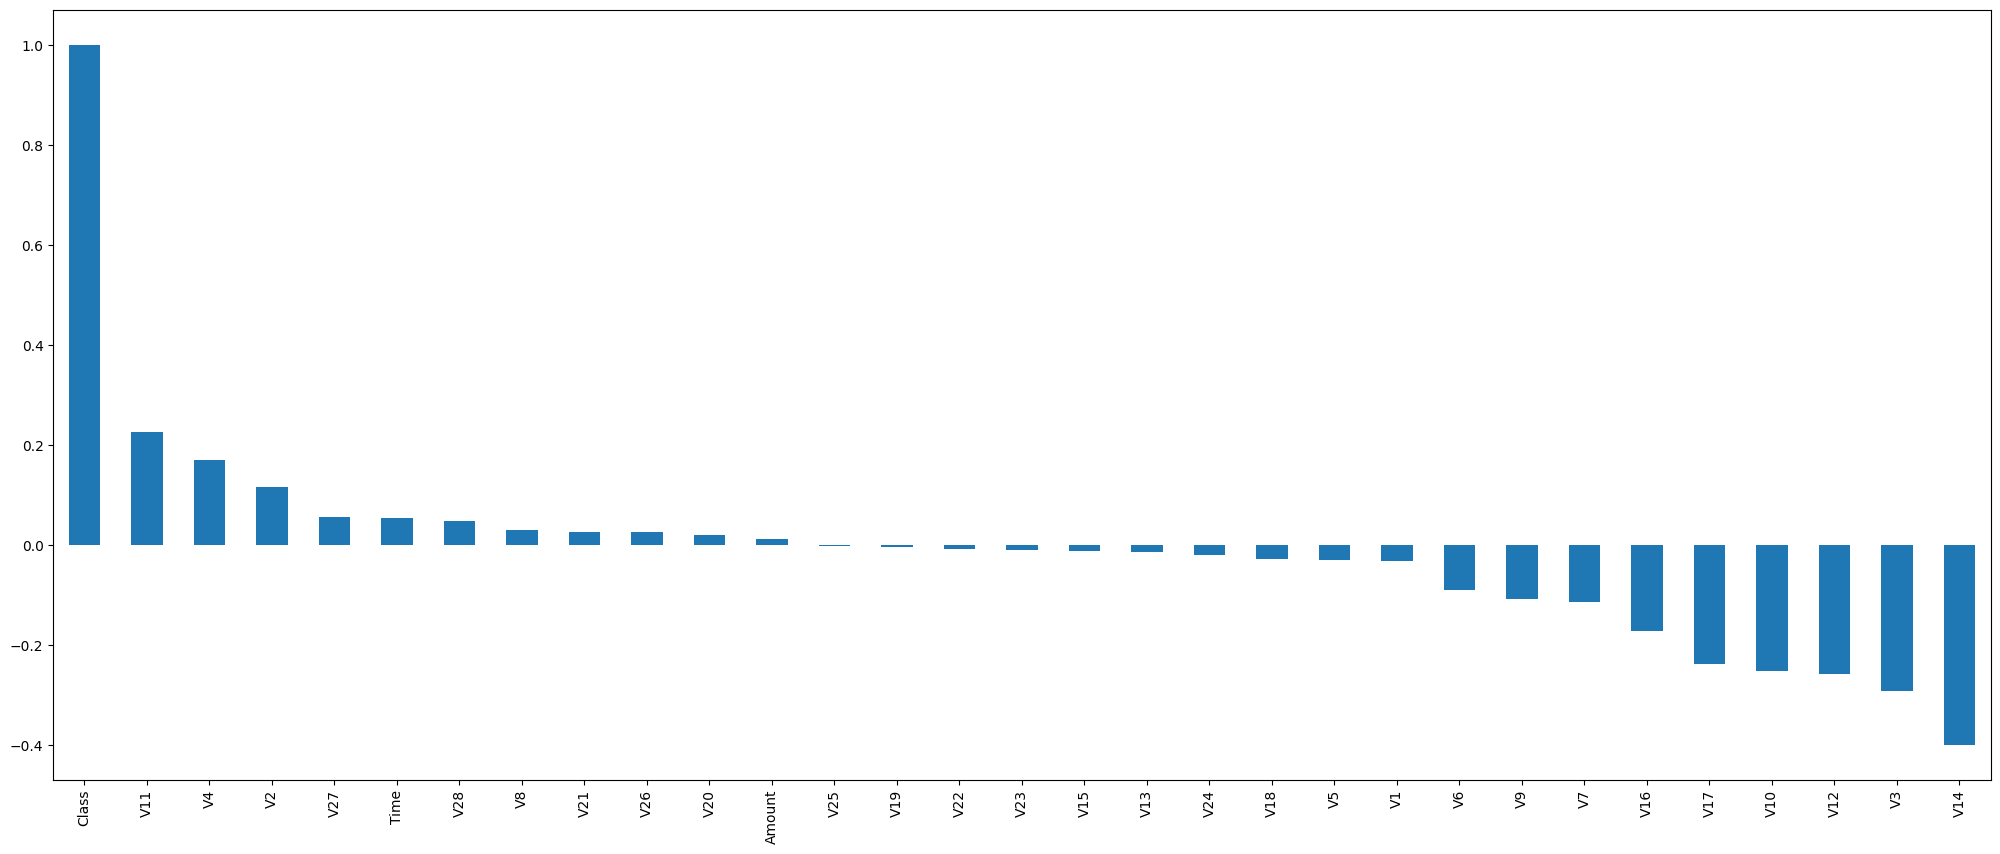

In [ ]:
plt.figure(figsize=(25,10))
df.corr()['Class'].sort_values(ascending = False).plot(kind='bar')
plt.show()

<ipython-input-16-fb6dd68197f6>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'].loc[df['Class']==1],bins = int(math.sqrt(len(df['Time'].loc[df['Class']==1]))*2), color='red')
<ipython-input-16-fb6dd68197f6>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'].loc[df['Class']=

Text(0.5, 1.0, 'Time distribution for Non-Fraud Transactions')

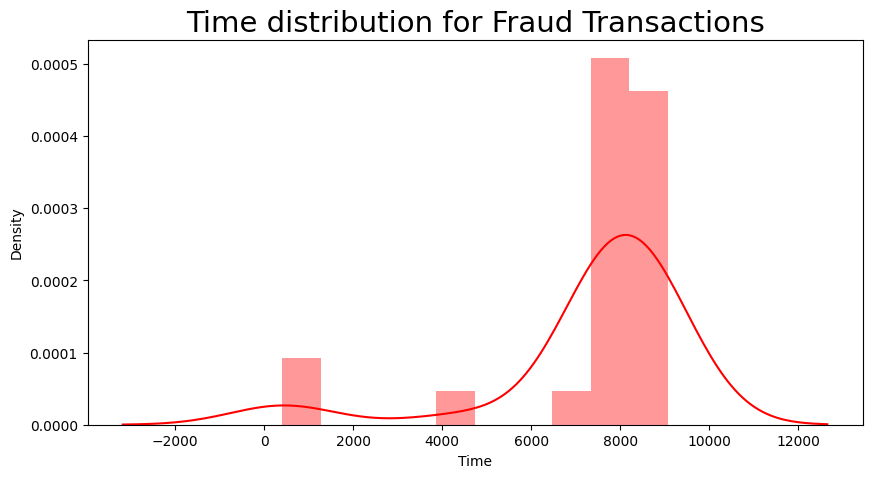

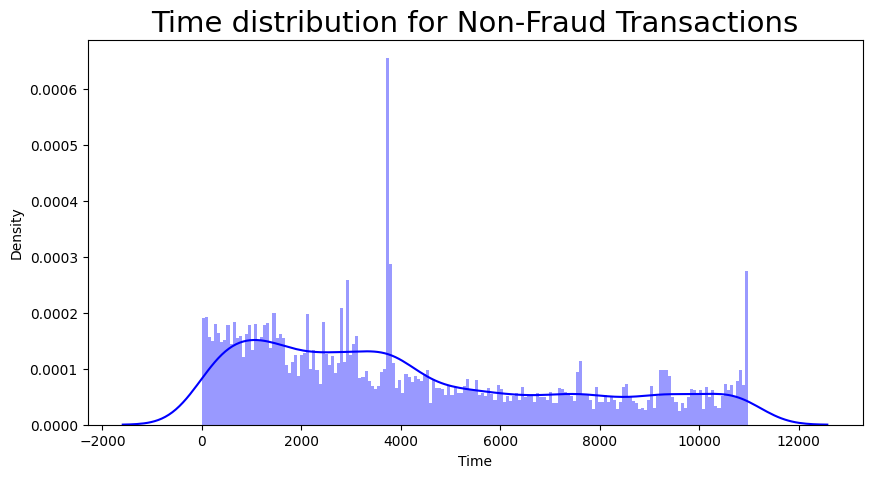

In [ ]:
import math # Import the math module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (10,5))
sns.distplot(df['Time'].loc[df['Class']==1],bins = int(math.sqrt(len(df['Time'].loc[df['Class']==1]))*2), color='red')
plt.title("Time distribution for Fraud Transactions", fontsize=21)

# Checking the frequency of Non-Fraud Transactions with respect to time
plt.figure(figsize = (10,5))
sns.distplot(df['Time'].loc[df['Class']==0],bins = int(math.sqrt(len(df['Time'].loc[df['Class']==0]))*2), color = 'blue')
plt.title("Time distribution for Non-Fraud Transactions", fontsize=21)

<ipython-input-17-e20dfddab03c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'].loc[df['Class']==1],bins = int(math.sqrt(len(df['Amount'].loc[df['Class']==1]))*2), color='blue')
<ipython-input-17-e20dfddab03c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'].loc[df['Cl

Text(0.5, 1.0, 'Amount distribution for both classes')

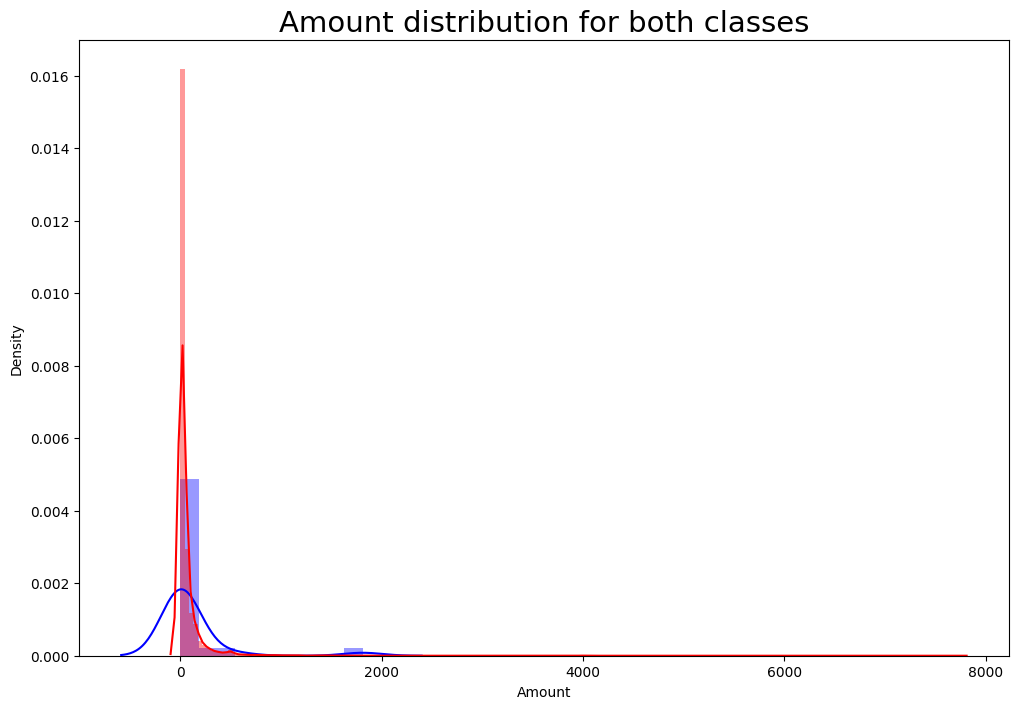

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(df['Amount'].loc[df['Class']==1],bins = int(math.sqrt(len(df['Amount'].loc[df['Class']==1]))*2), color='blue')
sns.distplot(df['Amount'].loc[df['Class']==0],bins = int(math.sqrt(len(df['Amount'].loc[df['Class']==0]))*2), color = 'red')
plt.title("Amount distribution for both classes", fontsize=21)

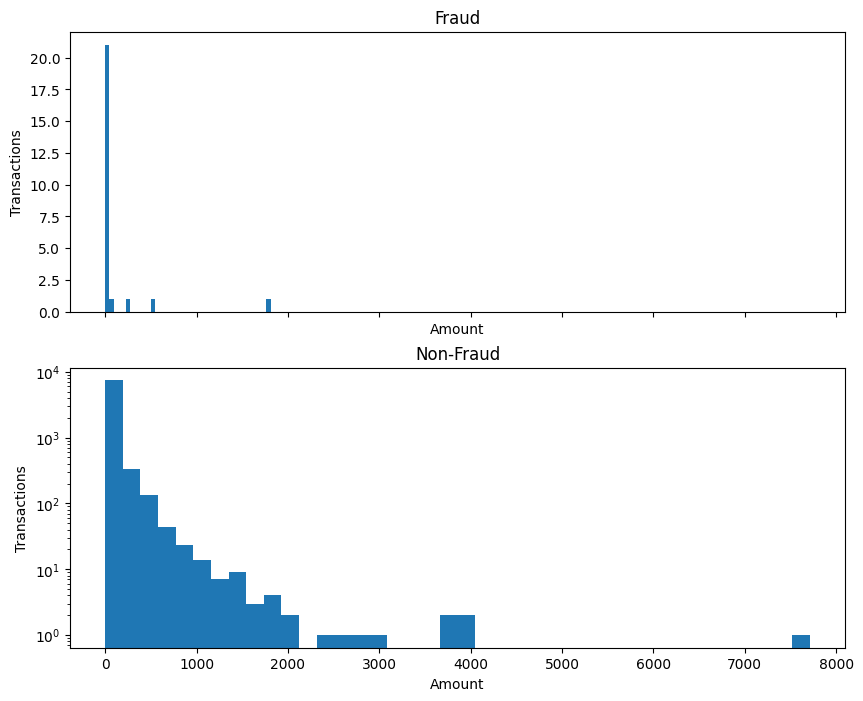

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,8))
bins = 40
ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')
ax1.set_ylabel('Transactions')
ax1.set_xlabel('Amount')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Non-Fraud')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Transactions')
plt.yscale('log')
plt.show()

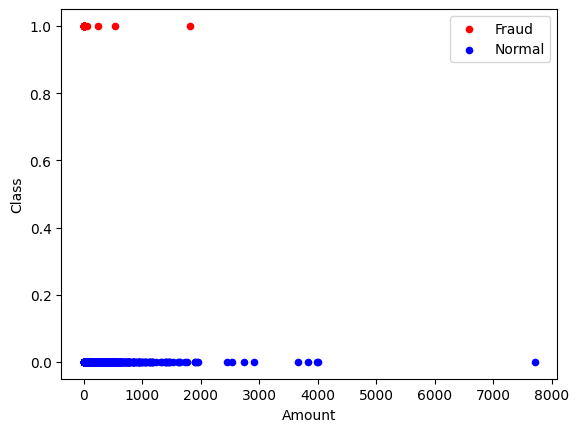

In [ ]:
fraud_df = df.loc[df['Class'] == 1]
Nonfraud_df = df.loc[df['Class'] == 0]
ax = fraud_df.plot.scatter(x='Amount', y='Class', c='Red', label='Fraud')
Nonfraud_df.plot.scatter(x='Amount', y='Class', c='Blue', label='Normal', ax=ax)
plt.show()

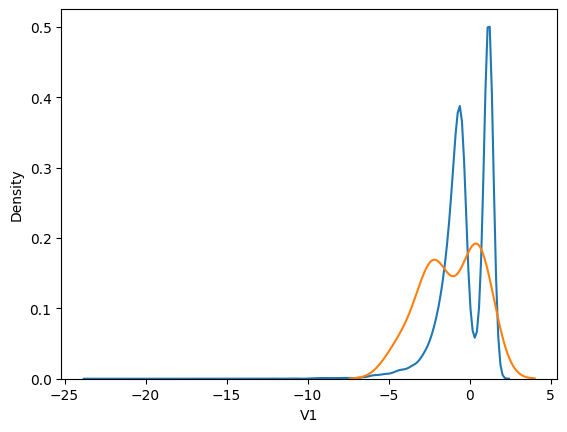

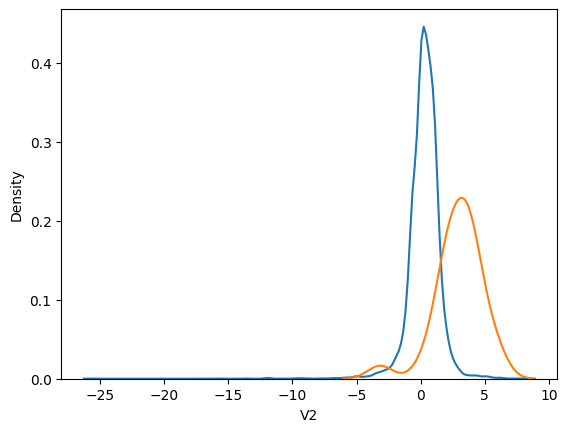

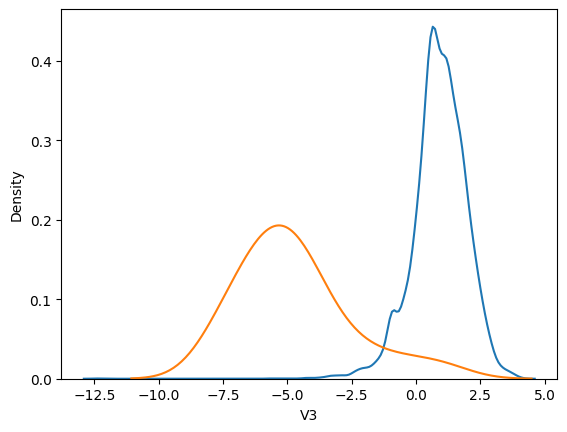

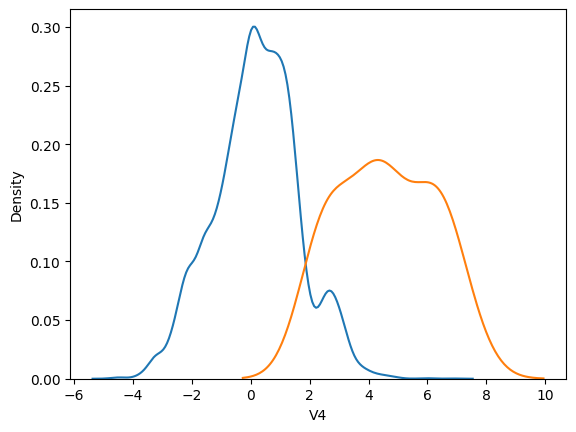

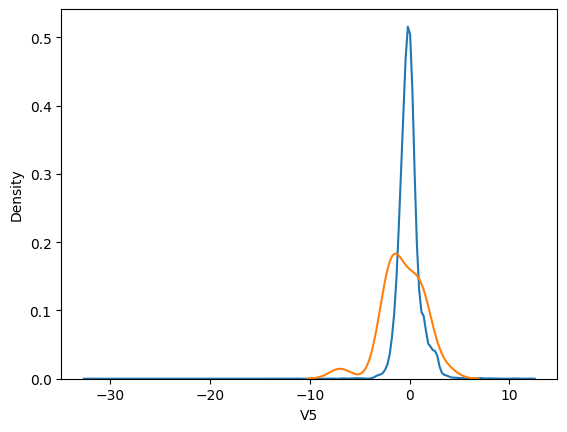

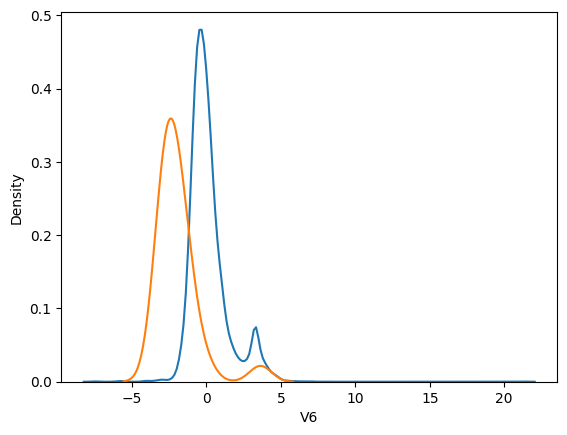

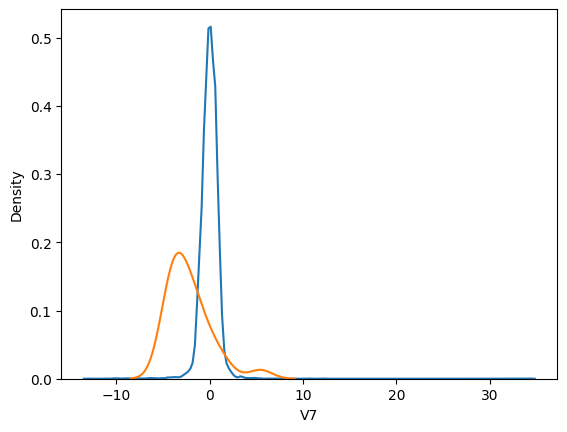

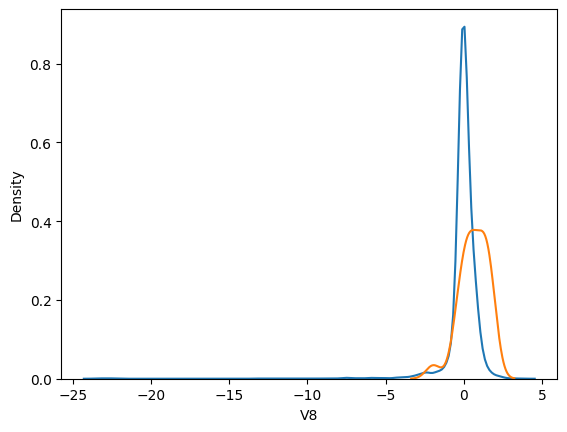

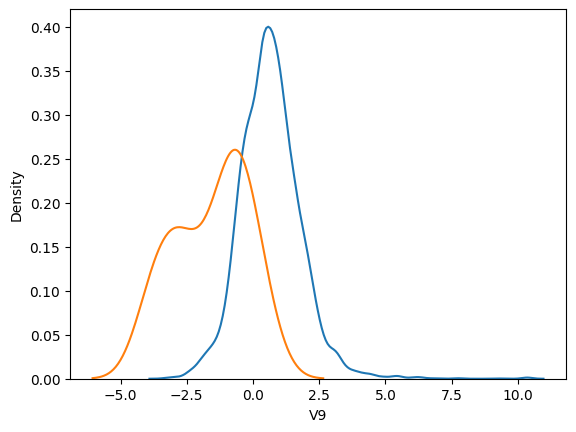

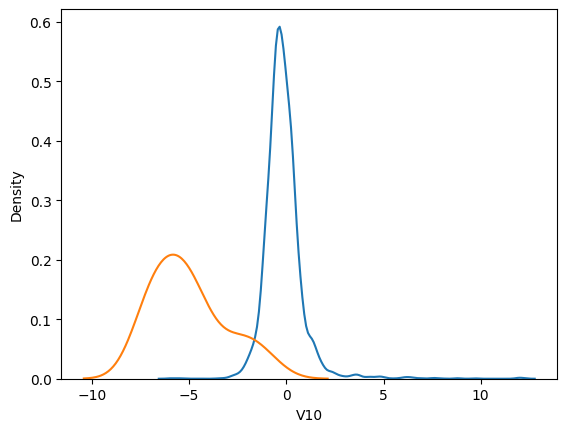

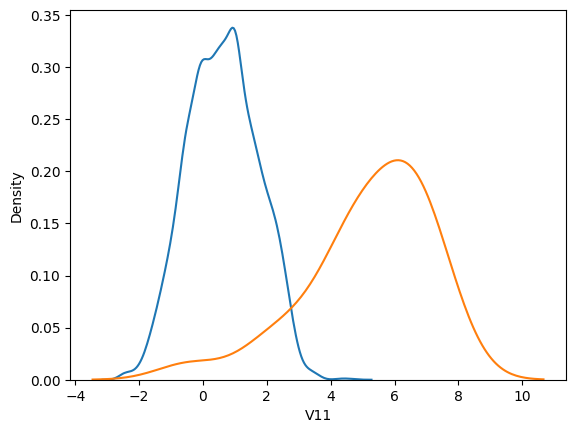

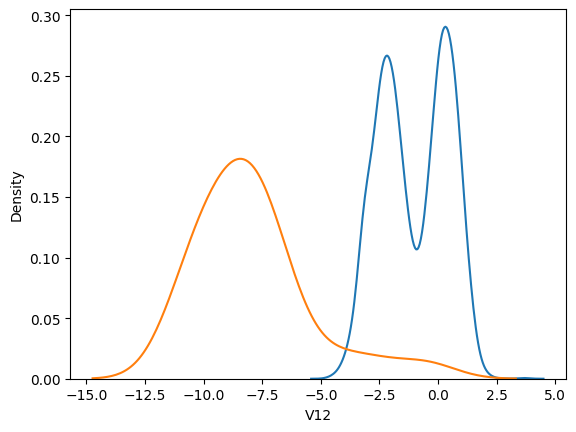

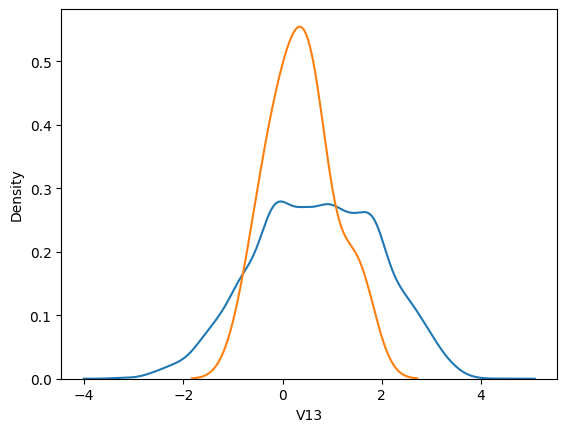

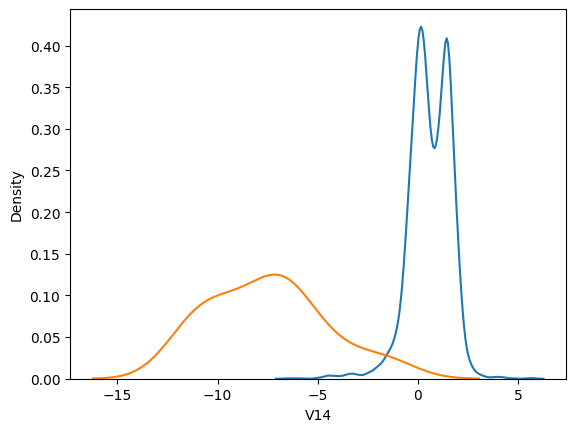

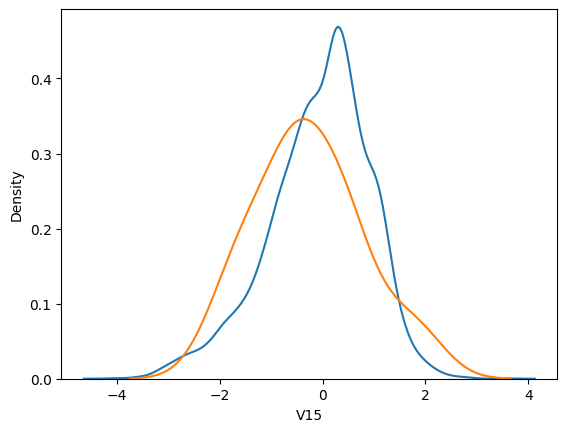

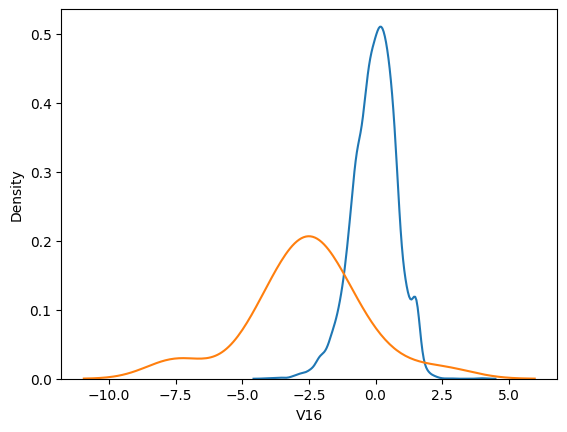

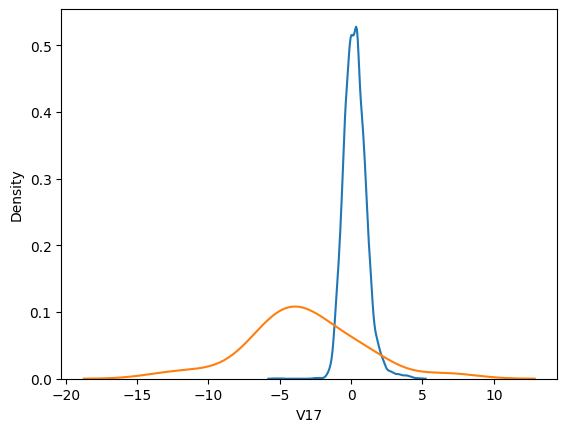

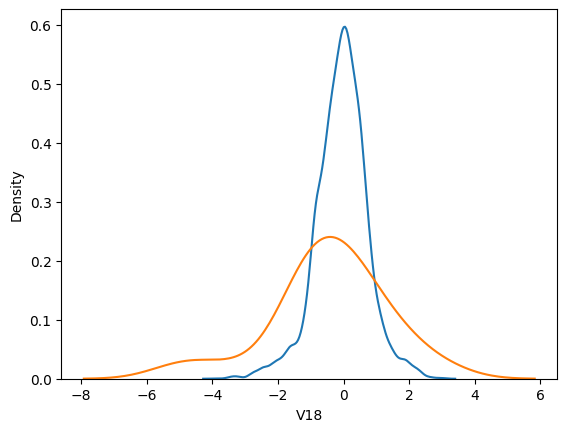

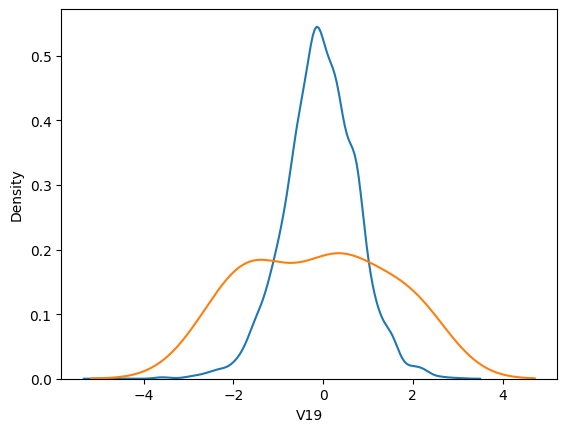

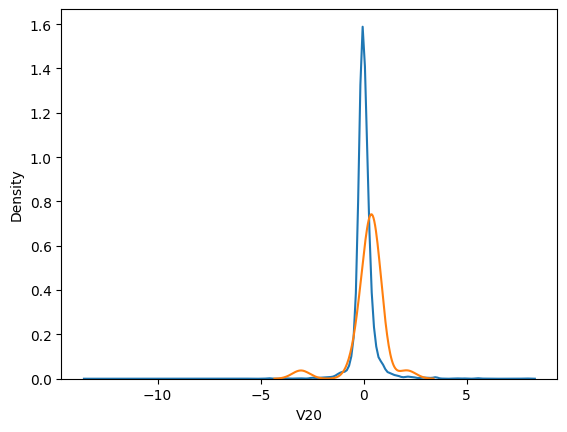

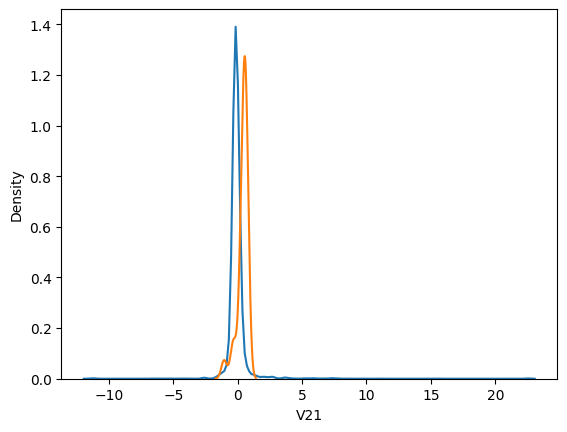

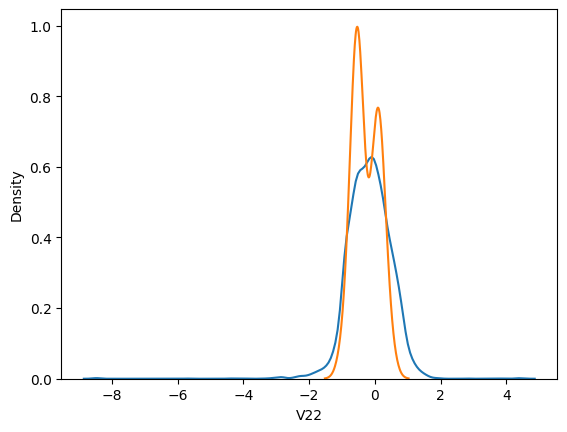

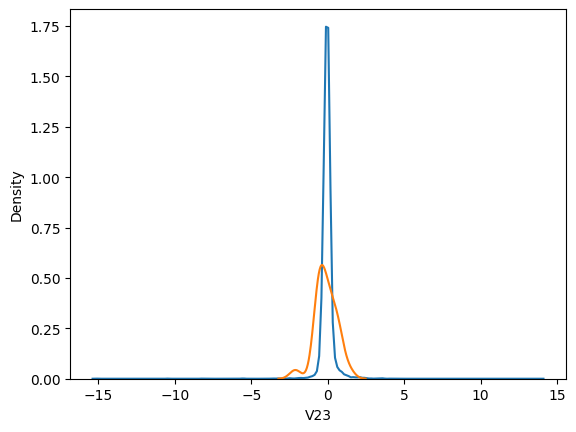

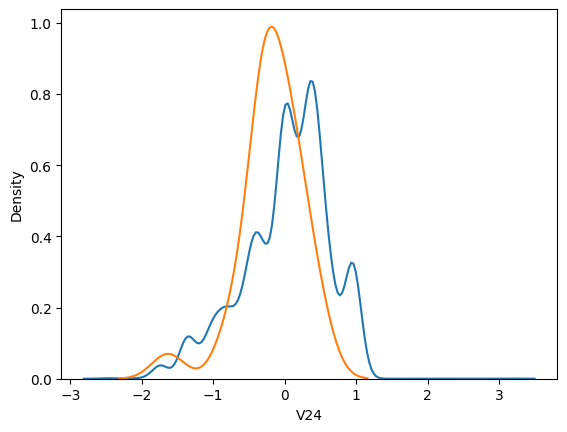

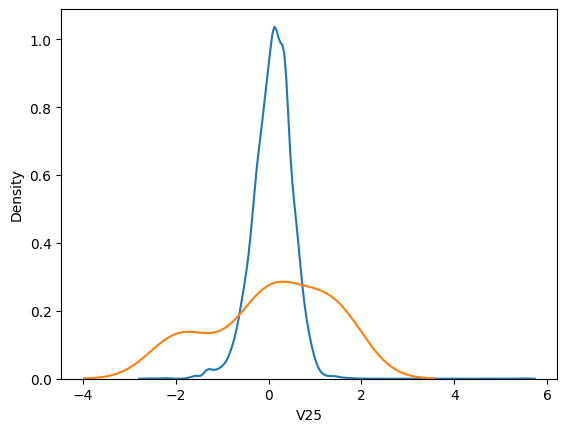

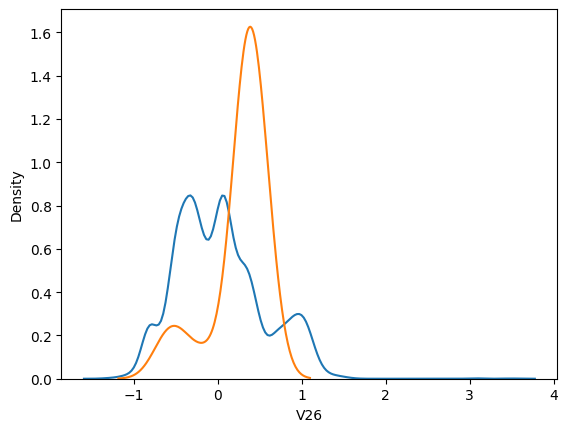

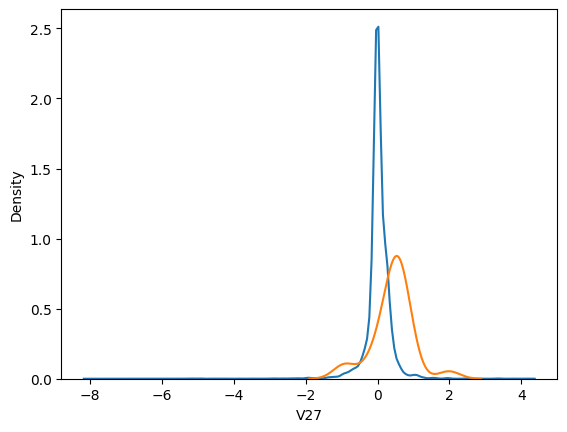

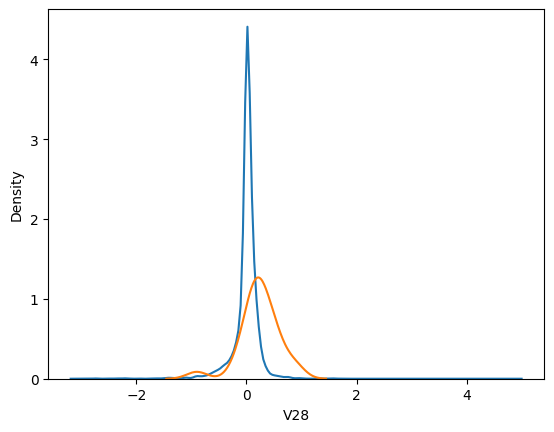

In [ ]:
for j in list(df):
    for i in range(2):
        if(j in ('Time','Amount','Class')):
            continue
        else:
            sns.kdeplot(df[df.Class==i][j])
    plt.show()

In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']

In [ ]:

import sys

# Function to take user input and predict fraud
def test_fraud_detection(model, scaler):
    print("\nEnter transaction details:")

    try:
        # Example: User enters feature values manually
        input_values = [float(input(f"Enter value for feature {i+1}: ")) for i in range(X_train.shape[1])]

        # Convert input to numpy array and scale
        input_array = np.array(input_values).reshape(1, -1)
        input_scaled = scaler.transform(input_array)

        # Make prediction
        prediction = model.predict(input_scaled)
        result = "Fraudulent Transaction" if prediction[0] == 1 else "Legitimate Transaction"

        print(f"Prediction: {result}\n")
    except ValueError:
        print("Invalid input. Please enter numerical values.")

# Uncomment to test after training
# test_fraud_detection(best_model, scaler)
